In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
df = pd.read_excel('Concrete_Data.xls')

In [3]:
df = df/df.mean()

In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.371692,1.167583,1.181027,0.117619,0.962983,0.079918,0.103642,1.383420,0.466407
min,0.362775,0.000000,0.000000,0.670554,0.000000,0.823296,0.767860,0.021900,0.065102
25%,0.684205,0.000000,0.000000,0.908208,0.000000,0.957942,0.944894,0.153300,0.661880
50%,0.970602,0.297718,0.000000,1.018911,1.023680,0.994944,1.007667,0.613200,0.961610
75%,1.244818,1.934489,2.182621,1.057465,1.637888,1.058054,1.065179,1.226399,1.288081
max,1.920576,4.863626,3.692758,1.360384,5.190943,1.176871,1.283127,7.993494,2.306092


In [5]:
data = df.values

In [6]:
train = data[:900]
test = data[900:]
x_train = train[:,:-1]
y_train = train[:,-1].reshape(900,1)
x_test = test[:,:-1]
y_test = test[:, -1].reshape(130,1)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(900, 8)
(900, 1)
(130, 8)
(130, 1)


In [7]:
lr = 1e-1
num_steps = 1000
display_step = 100
num_samples = x_train.shape[0]

In [8]:
weights = np.array([1.]*8).reshape(8,1)
bias = 1.

In [9]:
ep, ls = [], []
for step in range(1,num_steps+1):
    
    loss = np.mean(np.square((np.dot(x_train, weights) + bias) - y_train))
    
    if step == 1 or step%display_step==0:
        print ('Step : %04d' %(step), ' Loss: {}'.format(loss))
        ep.append(step)
        ls.append(loss)
        
    for k in range(len(weights)):
        weights[k] -= (lr/num_samples) * (np.dot(x_train[:,k],((np.dot(x_train, weights)+bias)-y_train)))
        bias -= (lr/num_samples) * sum((np.dot(x_train, weights)+bias)-y_train)

print ("\n Final Weights:")
print (weights)
print ("\n Bias:")
print (bias)

Step : 0001  Loss: 64.8996669983
Step : 0100  Loss: 0.108530472574
Step : 0200  Loss: 0.0991912667738
Step : 0300  Loss: 0.0961659353212
Step : 0400  Loss: 0.0948164519035
Step : 0500  Loss: 0.0939786172746
Step : 0600  Loss: 0.0933468723991
Step : 0700  Loss: 0.0928315639995
Step : 0800  Loss: 0.0923995308315
Step : 0900  Loss: 0.0920338180701
Step : 1000  Loss: 0.0917230936639

 Final Weights:
[[0.97627849]
 [0.22425438]
 [0.1584709 ]
 [0.04507438]
 [0.11153881]
 [0.887519  ]
 [0.71801464]
 [0.14030157]]

 Bias:
[-2.25755924]


In [10]:
preds = (np.dot(x_test ,weights) + bias)

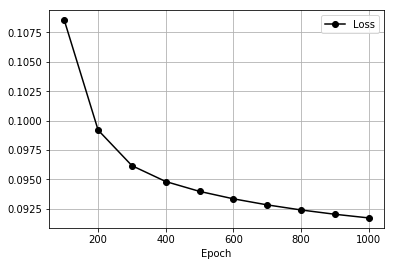

In [11]:
plt.plot(ep[1:], ls[1:], 'ko-', label='Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

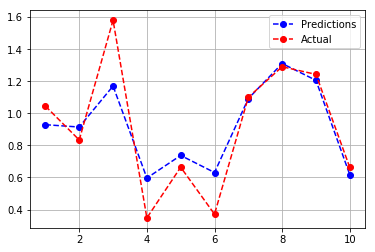


 Loss:  [1.30000407]


In [12]:
plt.plot(range(1,11), preds[:10], 'bo--', label="Predictions")
plt.plot(range(1,11), y_test[:10], 'ro--', label="Actual")
plt.grid()
plt.legend()
plt.show()
print ("\n Loss: ",sum(abs(preds[:10]-y_test[:10])))